In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1. Top 5 locations in which funding is being done maximum number of times .

NCR 709
Bangalore 637
Mumbai 449
Pune 91
Hyderabad 79


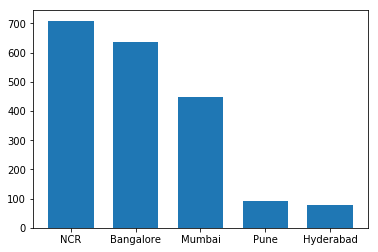

In [23]:
dforiginal = pd.read_csv('startup_funding.csv')

## This is being done to preserve original dataset
df = dforiginal.copy()

## dropping entries with NaN value in CityLocation column
df.CityLocation.dropna(inplace = True)

## removing few name issues in CityLocation column
df.CityLocation.replace('Delhi' , 'New Delhi' , inplace = True)
df.CityLocation.replace('bangalore' , 'Bangalore' , inplace = True)
location = df.CityLocation

## d stores location wise , no. of times funding is done in that location
d = {}

## As demanded in question , i have clubbed these 3 below given cities into NCR
l = ['New Delhi' , 'Noida' , 'Gurgaon']

## iterating in this location column 
for i in location:

## As either a row contains 2 city names(i.e. '/' also) or 1 city just .So , consodering the former case in this if
    if '/' in i:
        k = i.split('/')

## trimming extra spaces from left and right and storing in a list
        k = list(map(str.strip, k))

## as there are 2 cities in each row in this case(when '/' is there in location name) 
        for j in range(2):

## handling separately for NCR location while inserting in dictionary
            if k[j] in l:
                d['NCR'] = d.get('NCR' , 0) + 1
            else:
                d[k[j]] = d.get(k[j],0) + 1

## below case is for the rows having 1 city name in each row (i.e. without '/')
    else:
        i = i.strip()
        if i in l:
            d['NCR'] = d.get('NCR' , 0) + 1
        else:
            d[i] = d.get(i,0) + 1

## x will store location name and y no. of times it is being funded
x = []
y = []

## sorting dict d in descending order of values 
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1] , reverse = True)}
count = 0

## priting top 5 locations present in dict d and also appending in x and y to plot bar graph
for key in d:
    if count == 5:
        break
    print(key , d[key])
    x.append(key)
    y.append(d[key])
    count += 1

## plotting bar graph of location vs no. of times it is funded
plt.bar(x , y , width = 0.7)
plt.show()
                     

### 2 . Top 5 investors who have invested maximum number of times (considering repeat investments in one company also)

In [24]:
df = dforiginal.copy()

## considering NOT NaN values only in InvestorsName column
df = df[pd.notna(df.InvestorsName)]
inv_name = df.InvestorsName

# a dictionary to store count of no. of times an investor has invested.
d = {}
for row in inv_name.iteritems():
    
    ## as row[0] will contain row label so using row[1] and splitting investor's name (since multiple investors are possible)
    ##to get one name at a time in next for loop
    v = row[1].split(',')
    for i in v:
        i = i.strip()
        d[i] = d.get(i,0) + 1

## sorting dict d in descending order of values 
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1] , reverse = True)}

## priting top 5 Investors present in dict d 
count = 0
for k,v in d.items():
    if(count == 5):
        break
    print(k, ':' , int(v) , 'times')
    count += 1

Sequoia Capital : 64 times
Accel Partners : 53 times
Kalaari Capital : 44 times
SAIF Partners : 41 times
Indian Angel Network : 40 times


### 3 . Top 5 investors who have invested maximum number of times (NOT considering repeat investments in one company) [BETTER VERSION]

In [25]:
df = dforiginal.copy()

## considering NON NaN values only
df = df[pd.notna(df.InvestorsName)]
df = df[pd.notna(df.StartupName)]

## handling name issues 
df['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
df['StartupName'].replace("Ola Cabs", "Ola",inplace = True)
df['StartupName'].replace("Olacabs", "Ola",inplace = True)
df['StartupName'].replace("OYO Rooms", "Oyo",inplace = True)
df['StartupName'].replace("Oyo Rooms", "Oyo",inplace = True)
df['StartupName'].replace("OyoRooms", "Oyo",inplace = True)
df['StartupName'].replace("Oyorooms", "Oyo",inplace = True)
df['StartupName'].replace("Paytm Marketplace", "Paytm",inplace = True)
    
inv_name = df.InvestorsName

## a dictionary to store count of no. of times an investor has invested.
d = {}

## a set to store investor + startup's name clubbed together ensuring repeat investments are not considered in a startup
## by an investor 
visited = set()

## iterating in dataframe rowwise
for index , row in df.iterrows():

##  As a startup may have multiple investor's in a row , so splitting each name
    inv = row.InvestorsName.split(',')

## trimming extra spaces from left and right and also converting investor's name in title case for fair comparison
    inv = list(map(str.strip , inv))
    inv = list(map(str.title , inv))
    company = row.StartupName.strip()

## iterating over each investor int the current row, one at a time
    for i in inv:

## Ensuring Undisclosed investors , '' names and repeat investment in a company by an investor is not taken into account
        if (i+company) not in visited and i!= 'Undisclosed Investors' and i!= '':
            d[i] = d.get(i,0) + 1
            visited.add(i+company)

## sorting dict d in descending order of values         
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1] , reverse = True)}

## priting top 5 Investors present in dict d 
count = 0
for k,v in d.items():
    if(count == 5):
        break
    print(k, ':' , int(v) , 'times')
    count += 1

Sequoia Capital : 48 times
Accel Partners : 47 times
Kalaari Capital : 41 times
Indian Angel Network : 41 times
Blume Ventures : 36 times


### 4 . Top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. 

In [26]:
df = dforiginal.copy()

## considering NOT NaN values only
df = df[pd.notna(df.InvestorsName)]
df = df[pd.notna(df.StartupName)]

## handling issues in names
df.InvestmentType.replace('SeedFunding' , 'Seed Funding' , inplace = True)
df.InvestmentType.replace('PrivateEquity' , 'Private Equity' , inplace = True)
df.InvestmentType.replace('Crowd funding' , 'Crowd Funding' , inplace = True)
df['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
df['StartupName'].replace("Ola Cabs", "Ola",inplace = True)
df['StartupName'].replace("Olacabs", "Ola",inplace = True)
df['StartupName'].replace("OYO Rooms", "Oyo",inplace = True)
df['StartupName'].replace("Oyo Rooms", "Oyo",inplace = True)
df['StartupName'].replace("OyoRooms", "Oyo",inplace = True)
df['StartupName'].replace("Oyorooms", "Oyo",inplace = True)
df['StartupName'].replace("Paytm Marketplace", "Paytm",inplace = True)

## a set to store investor + startup's name clubbed together ensuring repeat investments are not considered in a startup
## by an investor 
visited = set()

## a dictionary to store count of no. of times an investor has invested.
d = {}

## iterating in dataframe rowwise
for index , row in df.iterrows():

## considering the required investment types
    if row['InvestmentType'] == "Seed Funding" or row['InvestmentType'] == 'Crowd Funding':

##  As a startup may have multiple investor's in a row , so splitting each name
        inv = row.InvestorsName.split(',')

## trimming extra spaces from left and right and also converting investor's name in title case for fair comparison
        inv = list(map(str.strip , inv))
        inv = list(map(str.title , inv))
        company = row.StartupName.strip()

## iterating over each investor in the current row , one at a time
        for i in inv:

## Ensuring Undisclosed investors , '' names and repeat investment in a company by an investor is not taken into account
            if (i+company) not in visited and i!= 'Undisclosed Investors' and i!= 'Undisclosed Investor' and i!= '':
                d[i] = d.get(i,0) + 1
                visited.add(i+company)


## sorting dict d in descending order of values
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1] , reverse = True)}

## priting top 5 Investors present in dict d 
count = 0
for k,v in d.items():
    if(count == 5):
        break
    print(k, ':' , int(v) , 'times')
    count += 1
        
        
        
        
        
        

Indian Angel Network : 34 times
Rajan Anandan : 23 times
Group Of Angel Investors : 19 times
Letsventure : 16 times
Anupam Mittal : 16 times


### 5 .  Top 5 investors who have invested in a different number of startups and their investment type is Private Equity.

In [27]:
df = dforiginal.copy()

## considering NOT NaN values only
df = df[pd.notna(df.InvestorsName)]
df = df[pd.notna(df.StartupName)]

## handling issues in names
df.InvestmentType.replace('SeedFunding' , 'Seed Funding' , inplace = True)
df.InvestmentType.replace('PrivateEquity' , 'Private Equity' , inplace = True)
df.InvestmentType.replace('Crowd funding' , 'Crowd Funding' , inplace = True)
df['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
df['StartupName'].replace("Ola Cabs", "Ola",inplace = True)
df['StartupName'].replace("Olacabs", "Ola",inplace = True)
df['StartupName'].replace("OYO Rooms", "Oyo",inplace = True)
df['StartupName'].replace("Oyo Rooms", "Oyo",inplace = True)
df['StartupName'].replace("OyoRooms", "Oyo",inplace = True)
df['StartupName'].replace("Oyorooms", "Oyo",inplace = True)
df['StartupName'].replace("Paytm Marketplace", "Paytm",inplace = True)

## a set to store investor + startup's name clubbed together ensuring repeat investments are not considered in a startup
## by an investor 
visited = set()

## a dictionary to store count of no. of times an investor has invested.
d = {}

## iterating in dataframe rowwise
for index , row in df.iterrows():

## considering the required investment type
    if row['InvestmentType'] == "Private Equity":

##  As a startup may have multiple investor's in a row , so splitting each name
        inv = row.InvestorsName.split(',')

## trimming extra spaces from left and right and also converting investor's name in title case for fair comparison
        inv = list(map(str.strip , inv))
        inv = list(map(str.title , inv))
        company = row.StartupName.strip()

## iterating over each investor in the current row , one at a time
        for i in inv:

## Ensuring Undisclosed investors , '' names and repeat investment in a company by an investor is not taken into account
            if (i+company) not in visited and i!= 'Undisclosed Investors' and i!= 'Undisclosed Investor' and i!= '':
                d[i] = d.get(i,0) + 1
                visited.add(i+company)

## sorting dict d in descending order of values
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1] , reverse = True)}


## priting top 5 Investors present in dict d 
count = 0
for k,v in d.items():
    if(count == 5):
        break
    print(k, ':' , int(v) , 'times')
    count += 1
        

Sequoia Capital : 45 times
Accel Partners : 43 times
Kalaari Capital : 35 times
Blume Ventures : 27 times
Saif Partners : 26 times
